# 1. Descripción del problema

El problema a tratar en este informe es el **Problema del sub-arreglo máximo**, el cual consiste en encontrar dentro de un arreglo A de largo $n$, un sub-arreglo compuesto por elementos contiguos uno del otro, el cual es de tamaño variable, con índices inicial y final $i$ y $j$ respectivamente, tal que $1 \leq i \leq j \leq n$, y por último, con la condición adicional que la suma que resulta de juntar todos los elementos de ese sub-arreglo, es la máxima posible dentro del arreglo original.  

**Entrada:** Un arreglo de tamaño $n$ de la forma $A = [a_1,a_2,...,a_n]$

**Salida**: Un sub-arreglo de tamaño $n$ y de la forma $A' = [a_1',a_2',...,a_n']$, en el cual la suma $a_1'+ a_2'+,...,+a_n'$ corresponde a la mayor suma de elementos contiguos dentro del arreglo original $A$.

**Tamaño del problema:** El tamaño para este problema viende definido por la cantidad $n$ de elementos dentro de el arreglo a estudiar.


<a href="https://imgur.com/juxuoQa"><img src="https://i.imgur.com/juxuoQa.png" title="source: imgur.com" /></a>

En la presente imagen se nos muestra un arreglo de tamaño 9, en el cual se nos marca con verde el sub-arreglo con elementos contiguos con la mayor suma dentro del arreglo original, cuyo valor corresponde a $1+2+3+6 = 12$.

### **Aplicaciones**

Las aplicaciones de este problema son variadas, he aquí unos ejemplos de ellas:

* En el área de la **bioinformática**, se presentan varios problemas de esta naturaleza al momento de realizar análisis de secuencias genómicas (ADN, ARN) para encontrar segmentos biológicos importantes dentro de las secuencias de proteínas.

* En los procesos correspondientes a **visión por computadora** (campo relacionado a la ingeniería y la informática, que se encarga de realizar análisis de alto nivel a partir de imágenes o videos), los algoritmos relacionados a este problema se utilizan al analizar imágenes con un mapa de bits, para así encontrar por ejemplo, el área con mayor iluminación dentro de estas.

# 2. Algoritmo solución: Divide y vencerás


## 2.1 Descripción



El problema del sub-arreglo máximo tiene tres principales soluciones. En primer lugar tenemos la solución conocida como **fuerza bruta**, que lleva ese nombre debido a que es la que conlleva un mayor tiempo de ejecución y es el más ineficiente, consiste en buscar cada posible sub-arreglo, sumarlos, para luego compararlos entre ellos y determinar el de suma mayor. En segundo lugar existe el algoritmo de Kadane, el cual tiene una complejidad y es el más eficiente en tiempo de las 3 opciones, el funcionamiento de este será explicado más adelante en este informe. Por último, tenemos el algoritmo que utiliza el mismo paradigma que el algoritmo Merge Sort anteriormente descrito: **"divide y vencerás"**. A continuación se presenta la aplicación del paradigma en este algoritmo.

**Entrada:** Un arreglo o lista con $n$ cantidad de números.

**Salida:** Índices $i$ y $j$ tal que $1 \leq i \leq j \leq n$, correspondientes a un sub-arreglo con elementos contiguos pertenecientes al arreglo original, los cuales al sumarlos dan una cantidad mayor a cualquier posible suma de los elementos de otros sub-arreglos existentes.

El algoritmo, como se mencionó, tiene una similitud en su funcionamiento con el Merge Sort, debido a que utiliza nuevamente el paradigma **"divide y vencerás"**, el la cual consiste en dividir un problema inicial en sub-problemas que sean más llevaderos o "fáciles" de solucionar, para así llegar a un resultado final. 

Este algoritmo lleva a cabo lo anterior realizando los siguientes tres pasos:

1. Se divide el arreglo de $n$ elementos en dos que contengan $n/2$ elementos y se busca recursivamente, es decir, aplicando el algoritmo en cada mitad, para así llegar primeramente al caso base, es decir, cuando queda solo un elemento y entonces el problema del sub-arreglo máximo se vuelve trivial. **(Dividir)**

2. Se busca el máximo de los sub-arreglos en ambas mitades conseguidas en el paso anterior, pero además se buscan sub-arreglos adicionales que contengan o "pasen" por la mitad del arreglo. lo anterior debido a que al analizar cada mitad por separado, estamos olvidando estos posibles sub-arreglos. Esta siguiente búsqueda se realiza mediante una función diferente que llamaremos ***maxSubArrayMid***. **(Conquistar)**

3. Se retorna mayor de los tres sub-arreglos obtenidos y se retorna el que tenga la mayor suma entre sus elementos. **(Vencer/Solución del problema)**

## 2.2 Código

In [10]:
def MaxSubArray(A, izq, der, verbose):
	if(verbose == True and izq != der):
		print("Arreglo a " + "\033[1m" + "separar: " + "\033[0m" + "\033[91m" + str(A[izq:der+1]) + "\033[0m")
	
	if izq == der: #Caso base, el sub-arreglo solo un elemento, se retorna ese elemento
		if(verbose == True):
			print("Se retorna elemento único:" + "\033[34m" + str(A[izq:der+1]) + "\033[0m")
		return A[izq], izq, der  #Se retorna el elemento junto con los índices respectivos

	mid = (izq + der + 1) // 2  #Se calcula la mitad del arreglo

	sumaIzq, inicioIzq, finIzq = MaxSubArray(A, izq, mid-1, verbose)		#Se busca la mayor suma de la mitad izquierda
	sumaDer, inicioDer, finDer = MaxSubArray(A, mid, der, verbose)			#Se busca la mayor suma de la mitad derecha
	sumaMid, inicioMid, finMid = MaxArrayMid(A, mid, izq, der)	#Se busca la mayor suma que considere la mitad del arreglo

	if(verbose == True):
		print("Arreglo a " + "\033[1m" + "analizar: " + "\033[0m" "\033[91m" + str(A[izq:der+1]) + "\033[0m")
	if(verbose == True):
		print("Máxima suma por la izquierda: ", sumaIzq)
	if(verbose == True):
		print("Máxima suma por la derecha: ", sumaDer)
	if(verbose == True):
		print("Máxima suma por el medio: ", sumaMid)
	
	res = max(sumaIzq, sumaDer, sumaMid) 		#Se busca la mayor suma entre las tres
 
	#Dependiendo del resultado de la suma mayor, se retorna el resultado y los índices correspondientes
	if(sumaIzq > sumaDer and sumaIzq > sumaMid):
		if(verbose == True):
			print("Se retorna el arreglo por la izquierda: " + "\033[92m" + str(A[inicioIzq:finIzq+1]) + "\033[0m" + " con suma: " + "\033[92m" + str(sumaIzq) + "\033[0m") 
		return sumaIzq, inicioIzq, finIzq
	elif(sumaDer > sumaIzq and sumaDer > sumaMid):
		if(verbose == True):
			print("Se retorna el arreglo por la derecha: " + "\033[92m" + str(A[inicioDer:finDer+1]) + "\033[0m" + " con suma: " + "\033[92m" + str(sumaDer) + "\033[0m")
		return sumaDer, inicioDer, finDer
	else:
		if(verbose == True):
			print("Se retorna el arreglo que pasa por el medio: " + "\033[92m" + str(A[inicioMid:finMid+1]) + "\033[0m" + " con suma: " + "\033[92m" + str(sumaMid) + "\033[0m")
		return sumaMid, inicioMid, finMid
 
def MaxArrayMid(A, mid, izq, der):  #Función para calculrar el mayor sub-arreglo que pase por el medio
	sum = 0 #Almacena la suma acumulada hasta un cierto índice i
	i = 0 #Almacena el límite izquierdo
	j = 0 #Almacena el límite derecho
	midIzq = -100000000  #Suma máxima por la izquierda
	midDer = -100000000  #Suma máxima por la derecha

	for l in range(mid-1, izq-1, -1): #Se itera buscando la máxima suma izquierda
		sum = sum + A[l]
		if(sum > midIzq):
			i = l #Se guarda el ínidice correspondiente al límite por la izquierda
			midIzq = sum

	sum = 0
	
	for l in range(mid, der+1):  #Se itera buscando la máxima suma derecha
		sum = sum + A[l]
		if(sum > midDer):
			j = l		#Se guarda el índice correspondiente al límite por la derecha
			midDer = sum

	res = midIzq + midDer
	return res, i, j 	#Se retorna el resultado de ambas sumas y los límites que conforman el sub-arreglo

#Ejemplo
A = [5,-4,3,8,-6,-2]
izq = 0 #Índice inicial
der = len(A)-1 #Índice final
verbose = False

print("Entrada: " + str(A) + "\n")
 
res, izq, der = MaxSubArray(A, izq, der, verbose)

print("\nEl mayor sub-arreglo es:", A[izq:der+1])
print("con una suma total de: ", res)


Entrada: [5, -4, 3, 8, -6, -2]


El mayor sub-arreglo es: [5, -4, 3, 8]
con una suma total de:  12


## 2.3 Ejemplo

En la siguiente imagen se iluistrará y luego se explicará un ejemplo del uso del algoritmo para el arreglo `A = [5, -4, 3, 8, -6, -2]`:

<a href="https://imgur.com/gg087j8"><img src="https://i.imgur.com/gg087j8.jpg" title="source: imgur.com" /></a>

* **Paso 1:** En este paso lo primero que se hace es dividir el arreglo a la mitad. Debido a que es un arreglo de tamaño 6, los sub-arreglos resultantes son de tamaño 3.

* **Paso 2:** Para este paso cada sub-arreglo es dividido en dos también, debido a que son ambos de tamaño tres, dan como resultado dos sub- arreglos de tamaño 1 y 2 respectivamente.

* **Paso 3:** En este siguiente paso se consigue el primer objetivo principal del Merge Sort, dividir a la mínima capacidad el problema, teniendo finalmnente 6 sub-arreglos de tamaño 1, los cuales contienen cada componente del arreglo original.

* **Paso 4:** En el paso cuatro es en el cual se vuelven a juntar los elementos divididos, y se comienzan a buscar las máximas sumas de la parte izquierda, derecha y central de cada sub-arreglo.

* **Paso 5:** Para este paso es importante observar que los sub arreglos contienen los mismos números que los del paso 2, con la característica que cada sub-arreglo lleva una etiqueta en la cual se destaca la mayor suma conseguida por cada mitad.

* **Paso 6:** En este paso es donde se reciben estas máximas sumas del sub-arreglo de la izquierda y de la derecha, para finalmente aplicar la función **MaxArrayMid**  y buscar esos sub-arreglos centrales que no han sido considerados.

* **Paso 7:** Para el paso final se muestra cuál es el sub-arreglo que contiene entre sus elementos la máxima suma posible de conseguir dentro del arreglo, junto con su valor. Para el caso del ejemplo tenemos que el máximo sub-arreglo es `A' = [5,-4,3,8]` con una suma total de **12**.

## 2.4 Ejecución del código con opción verbose

In [3]:
import random

A = random.sample(range(-20, 20), 7)
izq = 0 #Índice inicial
der = len(A)-1 #Índice final
verbose = True

print("Entrada: ", A)

res, izq, der = MaxSubArray(A, izq, der, verbose)

print("\nEl mayor sub-arreglo es:", A[izq:der+1])
print("con una suma total de: ", res)

Entrada:  [-14, -7, -3, -5, 3, 4, -2]
Arreglo a separar: [-14, -7, -3, -5, 3, 4, -2]
Arreglo a separar: [-14, -7, -3]
Se retorna elemento único:[-14]
Arreglo a separar: [-7, -3]
Se retorna elemento único:[-7]
Se retorna elemento único:[-3]
Arreglo a analizar: [-7, -3]
Máxima suma por la izquierda:  -7
Máxima suma por la derecha:  -3
Máxima suma por el medio:  -10
Se retorna el arreglo por la derecha: [-3] con suma: -3
Arreglo a analizar: [-14, -7, -3]
Máxima suma por la izquierda:  -14
Máxima suma por la derecha:  -3
Máxima suma por el medio:  -21
Se retorna el arreglo por la derecha: [-3] con suma: -3
Arreglo a separar: [-5, 3, 4, -2]
Arreglo a separar: [-5, 3]
Se retorna elemento único:[-5]
Se retorna elemento único:[3]
Arreglo a analizar: [-5, 3]
Máxima suma por la izquierda:  -5
Máxima suma por la derecha:  3
Máxima suma por el medio:  -2
Se retorna el arreglo por la derecha: [3] con suma: 3
Arreglo a separar: [4, -2]
Se retorna elemento único:[4]
Se retorna elemento único:[-2]
Arr

Las impresiones en caso de que la opción *verbose* esté activada ilustran en primer lugar como el arreglo original así como cada sub-arreglo (resaltados en rojo) se va dividiendo, hasta llegar a elementos unitarios (resaltados en azul). Después de esto, se remarca cuál sub-arreglo se está analizando (resaltado en rojo) para encontrar sus mayores sumas. Finalmente se muestra el sub-arreglo retornado en cada llamada recursiva, el cual corresponde al de mayor suma encontrada (ambas componentes resaltadas en verde).

# 3. Propidades del algoritmo

## 3.1Tiempo de ejecución

Para el tiempo de ejecución de este algoritmo, se debe analizar el comportamiento de este según su entrada. Así se tiene que ***divide y vencerás*** se comporta de dos maneras dependiendo del tamaño de su entrada. Por un lado si el arreglo a ordenar es de tamaño 1, se retorna el elemento en cuestión, lo cual tiene una complejidad constante $O(1)$. Para todos los otros casos, el procedimiento del algoritmo al ser recursivo es dividir el problema en dos mitades de tamaño $n \above 1pt 2$. A cada uno de estos sub-arreglos resultantes se les aplicará el mismo algoritmo, se procederá así sucesivamente hasta llegar en cada uno al caso base inicialmente mencionado, el tiempo que se repetirá este procedimiento hasta dividir cada uno de los arreglos es de $log_2(n)$. Luego de esto viene la parte de la tarea que queda por hacer, que es el encontrar las mayores sumas en la izquierda, la derecha y al medio, lo cual tendrá una complejidad de $O(n)$.

Bajo esta primicia resulta la siguiente función de recursión:

$T(n) = 2T(n/2) + O(n)$

Se puede apreciar que es la misma función que representaba el algoritmo Merge Sort, sin embargo, para este caso se utilizará un nuevo método para calcular la complejidad temporal de este algoritmo, el teorema maestro.

El teorema maestro postula que para cualquier función de recurrencia de la forma: $T(n) = aT(n/b) + O(n^d)$ su complejidad temporal vendrá dada por alguna de las siguientes tres relaciones:

\begin{equation}
T(n) = \begin{cases}
  O(n^d log (n)) & a = b^d \\
  O(n^d) & a<b^d \\
  O(n^{log_b(a)}) & a>b^d
\end{cases}
\end{equation}

Teniendo este teorema el cálculo de complejidad temporal se vuelve sencillo, debido a que se pueden identificar facilmente cada variable dentro de la ecuación a analizar para el algoritmo. Se tiene que $a = 2$, $b = 2$ y $d = 1$, por lo tanto, se está en presencia del primer caso posible, en el cual $2 = 2^1 = 2$. Finalmente, para el algoritmo de divide y vencerás se tiene una complejidad de $O(n^1 log (n)) = O(nlog(n))$.

Lo anterior es fácilmente comprobable mediante un árbol de recursión, tenemos que la altura de este árbol sería la cantidad de particiones para llegar al caso base, lo cual corresponde a $log_2(n)$, mientras que la complejidad total de cada nivel es de $cn$, que es el remanente de tiempo que aporta la función **MaxArrayMid**. Además se debe tener en consideración que la cantidad de nodos por nivel es de $2^d$, siendo $d$ el nivel el cual se analiza, sin embargo esta variable al no depender directamente del tamaño del problema se vuelve despreciable, luego eliminando las constantes numéricas da como resultado la notación big-O anteriormente mencionada para la complejidad temporal del algoritmo.

Es importante recalcar que el mejor caso de este algoritmo y el peor caso son de cierta forma "relativos", ya que ambos tienen exactamente la misma complejidad $O(n \log(n))$. Esto es debido a que en ambos casos el algoritmo desarma el arreglo ($log(n)$) y luego lo vuelve a combinar, aplicando la función **MaxArrayMid**($n$), buscando así la máxima suma posible en cada llamada recursiva.

## 3.2 Correctitud

### **3.2.1 Teorema  de correctitud de función MaxArrayMid**

El algoritmo MaxArrayMid, dado un arreglo del orden $[a_1,a_2, \ldots ,a_n]$, retorna un sub-arreglo $[a_1',a_2', \ldots ,a_n']$ el cual cumple las condiciones de contener los elementos que se encuentran en el centro del arreglo original, además de ser la mayor de las sumas posibles dentro de las combinaciones contiguas que consideren los números de las posiciones de en medio del arreglo en cuestión. 

### **Prueba del teorema**

* **Propiedad invariante de bucle**: En cada iteración, la función MaxArrayMid considera la mayor suma posible en un intervalo `[i,mid]` y `[mid+1,j]`.

**Inicialización**

Se tiene que las variables con nombre `midIzq` y `midDer` son las que guardan la mayor suma encontrada hasta el momento desde el inicio del arreglo hasta un punto central `mid` y desde `mid+1` hasta el final del arreglo, respectivamente. Para la primera iteración, estas variables son inicializadas en un valor cercano a $-∞$, es por esto que en la primera entrada al bucle, el número que se encuentra en `mid` es el que se guardará en la variable `midIzq`, debido a que es un solo elemento y es mayor a $-∞$, por lo que representa a la mayor suma encontrada en el intervalo`[mid,mid]`. Este proceso ocurre de manera análoga con respecto a la variable `midDer` y el intervalo `[mid+1,mid+1]`

* **Imagen de explicación de la inicialización:**

<a href="https://imgur.com/ECimXUn"><img src="https://i.imgur.com/ECimXUn.jpg" title="source: imgur.com" /></a>

Se puede observar como la variable `midIzq` contiene a $-∞$ dentro de ella, luego de ser este valor comparado con el elemento correspondiente a la posición `mid`, la variable `midIzq` se actualiza con el valor $5$.

**Mantención**

Para la mantención se debe analizar lo que ocurre con la i-ésima iteración. En este caso, se asume que las variables `midIzq` y `midDer` guardan la mayor suma encontrada hasta el momento en cada mitad. Teniéndo en cuenta esto, para la i-ésima iteración se suma el número que se encuentre en una posición a una distancia `i` de `mid`, luego de esto, se compara si la suma resultante es mayor a lo que esté guardado en `midIzq`, de ser verdadera aquella comparación, el nuevo valor resultante se guarda en `midIzq` y se actualiza el índice que delimita el limite izquierdo del sub-arreglo a retornar. De igual forma que para la incialización, este proceso se repite para el intervalo `[mid+1,j]`, siendo `j` el límite derecho de este sub-arreglo.

Finalmente el mayor sub-arreglo que contenga los elementos centrales del arreglo original es aquel delimitado por los índices resultantes `i` y `j`, y su resultado será el que resulte de sumar los valores dentro de `midIzq` y `midDer`.

* **Imagen de explicación de la mantención:**

<a href="https://imgur.com/7HA1QeO"><img src="https://i.imgur.com/7HA1QeO.jpg" title="source: imgur.com" /></a>

En la anterior imagen podemos ver en color verde los valores considerados hasta el momento dentro de lo que es el mayor sub-arreglo encontrado en cada mitad del arreglo original, luego vemos cómo las flechas indican los elementos contiguos a añadir, para luego comparar el resultado de la suma de ambos números con el valor guardado en `midIzq`, en caso de cumplirse la desigualdad planteada, los valores de `midIzq` y `midDer` se actualizan así también como los índices `i` y `j`. Cabe recalcar que al final de la función **MaxArrayMid**, se retornan los índices para marcar el inicio y fin del máximo sub-areglo central, además de también retornar la suma `midIzq + midDer`.

Al comprobar que esta propiedad se cumple al inicio del algoritmo y durante la iteración *i-ésima*, la propiedad **invariante del bucle** queda demostrada, así también la correctitud de la función **MaxArrayMid**.



### **3.2.2 Teorema  de correctitud de algoritmo MaxSubArray**

El algoritmo MaxSubArray, luego de ser aplicado en un arreglo del orden $[a_1,a_2, \ldots ,a_n]$, retorna los índices de un sub-arreglo $[a_1',a_2', \ldots ,a_n']$ el cual cumple las condiciones de contener elementos del arreglo original, pero con la condición de que $a_1' + a_2' +\ldots + a_n'$ es la mayor suma posible dentro del arreglo al cual se le aplicó el algoritmo.

### **Prueba del teorema**

Debido a que MaxSubArray es un algoritmo recursivo, para la prueba de este segundo teorema se hará uso del método de inducción matemática, el cual consiste en demostrar que una propoisición $P(n)$ se cumple para todos los números $n$. Para esto se deben aplicar los siguientes puntos:

1. Probar que $P(n)$ se cumple para un caso base.
2. Probar que si $P(n)$ es verdadera, entonces también se cumple para un caso con tamaño $n+1$ 

### **Caso base**

El caso base es para cuando $n=1$, en este caso el algoritmo retorna el mismo elemento. Al ser este un sub-arreglo de tamaño $1$, el único elemento que contiene es también trivialmente la mayor suma posible dentro del sub-arreglo, por lo cual el algoritmo para este caso funciona correctamente.

### **Paso inductivo**

Para este caso se asume que la propiedad de Merge Sort se cumple para todos los elementos menores o iguales a $n$. Luego observamos que para una entrada por ejemplo de $n+1$, tenemos que el algoritmo genera dos sub-arreglos de tamaño $n+1 \above 1pt 2$ cada uno, para los cuales la propiedad $P(n)$ se cumple correctamente en cada uno de ellos debido a lo anteriormente mencionado, ya que ${n+1 \above 1pt 2} \leq n$.

Finalmente el algoritmo compara los tres valores conseguidos, retornando el mayor de estos tres, es gracias a esta última comparación que se demuestra la correctitud del algoritmo, debido que se asume funciona correctamente para los valores menores a $n$ como $n+1 \above 1pt 2$, mientras que por otro lado la función **MaxArrayMid** funciona correctamente para cualquier valor de $n$ (comprobado en el punto anterior), por ende no existe la posibilidad de que ambas funciones hayan retornado valores erróneos que generen alguna posible contradicción. Así se puede concluir como demostrado el teorema de correctitud del algoritmo **MaxSubArray**.

# 4. Experimentos

In [29]:
#Código extraído de https://www.techiedelight.com/es/maximum-subarray-problem-kadanes-algorithm/

import sys

# Función para encontrar la suma máxima de un subarray contiguo
# en una array de enteros dada (también maneja números negativos)
def kadaneNeg(A):
    # almacena la sublista de suma máxima encontrada hasta el momento
    max_so_far = -sys.maxsize
 
    # almacena la suma máxima de la sublista que termina en la posición actual
    max_ending_here = 0
 
    # recorrer la lista dada
    for i in range(len(A)):
        # actualice la suma máxima de la sublista "finalizando" en el índice `i` (agregando el
        # elemento actual a la suma máxima que termina en el índice anterior `i-1`)
        max_ending_here = max_ending_here + A[i]
 
        # La suma máxima de # debe ser mayor que el elemento actual
        max_ending_here = max(max_ending_here, A[i])
 
        # actualiza el resultado si se encuentra que la suma de la sublista actual es mayor
        max_so_far = max(max_so_far, max_ending_here)
 
    return max_so_far
 
A = [5, -4, 3, 8, -6, -2]
print("La mayor suma dentro del arreglo es", kadaneNeg(A))

La mayor suma dentro del arreglo es 12


## 4.1 Comparación con algoritmo de Kadane

El algoritmo de Kadane corresponde a otra manera de resolver el problema del sub-arreglo máximo, sin embargo, esta opción es más eficiente en tiempo que el divide y vencerás debido a que tiene una complejidad temporal lineal de **O(n)**, este algoritmo logra ese rendimiento debido a que no utiliza ninguna función para ir dividiendo el arreglo, sino que .

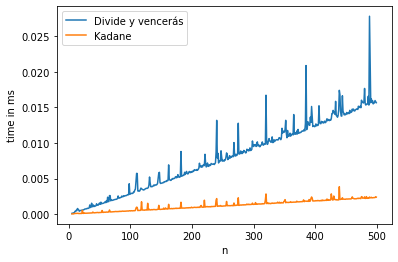

In [34]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x = []; y1 = [] ; y2 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  izq = 0
  der = len(a)-1
  verbose = False
  #la función repeat está ejecutando 20 veces InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{izq},{der}, {verbose})", repeat=1, number=10)

  k = repeat(setup="from __main__ import kadaneNeg", stmt=f"kadaneNeg({a})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(k)


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Divide y vencerás", "Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### **Análisis de resultados**

Luego de analizar el gráfico en cuestión, se observan ciertos picos de rendimiento, los cuales se pueden deber a propiedades del procesador, debido a que a pesar de correr varias veces el código estos se mantienen presentes en las gráficas, o también existe la posibilidad de que mientras este código de algoritmo de Kadane retorna solo la suma total, el "divide y vencerás" implementado en este informe se debe hacer cargo del control de índices para delimitar el sub-arreglo mayor, lo que podría ocasionar esas anomalías en el rendimiento. A pesar de esto, ambos algoritmos resuelven los problemas planteados en tiempos óptimos menores a 0.1 [ms], aunque es importante recalcar que el tiempo de rendimiento del algoritmo de Kadane crece de manera más lenta a comparación de divide y vencerás, esto comprueba las complejidades temporales teóricas de $O(nlog(n))$ y $O(n)$ respectivamente.

In [31]:
#Código extraído de https://www.techiedelight.com/es/maximum-sum-subarray-using-divide-conquer/

import sys


# Solución ingenua para encontrar la suma máxima de sublista usando divide y vencerás
def findMaximumSum(nums):
 
    maxSum = -sys.maxsize
 
    # do para cada sublista que comience con `i`
    for i in range(len(nums)):
 
        # calcula la suma de la sublista `nums[i…j]`
 
        total = 0        # suma de reinicio
 
        # do para cada sublista que termina en `j`
        for j in range(i, len(nums)):
            total += nums[j]
 
            # si la suma de la sublista actual es mayor que la suma máxima
            # calculado hasta ahora, actualice la suma máxima
            if total > maxSum:
                maxSum = total
 
    return maxSum

## 4.2 Comparación con fuerza bruta

Luego del experimento anterior, queda la interrogante de qué tal se comporta el algoritmo "divide y vencerás" con respecto al último método posible para resolver el problema, el llamado "fuerza bruta", el cual como se mencionó antes, es el de peor rendimiento con un $O(n^2)$ debido a la forma de proceder.

A continuación se muestra una comparación gráfica del tiempo de ejecución de ambos algoritmos.

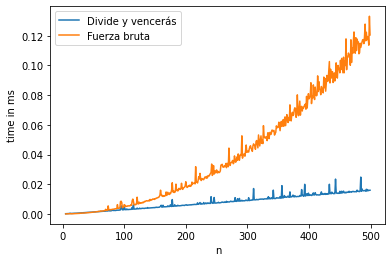

In [33]:
x = []; y1 = [] ; y2 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  izq = 0
  der = len(a)-1
  verbose = False
  #la función repeat está ejecutando 20 veces InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{izq},{der}, {verbose})", repeat=1, number=10)

  k = repeat(setup="from __main__ import findMaximumSum", stmt=f"findMaximumSum({a})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(k)


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Divide y vencerás", "Fuerza bruta"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### **Análisis de resultados**

Existe una cierta similitud en la diferencia que se aprecia entre uno y otro algoritmo, ahora "divide y vencerás" ocupa la posición del algoritmo más rápido mientras que "fuerza bruta" tiene un crecimiento pronunciadamente cuadrático, llegando a picos de rendimiento de 0.12[ms] mientras que el otro método no llega ni a la décima de milisegundo en sus valores más altos. Es importante mencionar que al momento de correr el código que genera esta segunda gráfica, hubo una diferencia de tiempo importante a comparación de la primera, este gráfico entre fuerza bruta y divide y vencerás tardó una media de 15 segundos en generarse completamente, mientras que el primero tardó menos de 10 segundos.

## 4.3 Comparación de los tres algoritmos

A continuación se muestra la gráfica de los 3 métodos explicados en este informe comparados entre si.

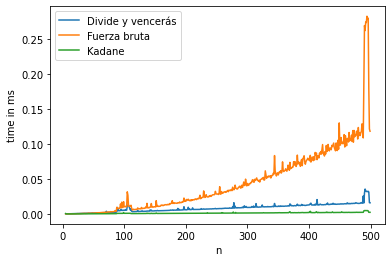

In [36]:
x = []; y1 = [] ; y2 = [] ; y3 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  izq = 0
  der = len(a)-1
  verbose = False
  #la función repeat está ejecutando 20 veces InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{izq},{der}, {verbose})", repeat=1, number=10)

  k = repeat(setup="from __main__ import findMaximumSum", stmt=f"findMaximumSum({a})", repeat=1, number=10)

  l = repeat(setup="from __main__ import kadaneNeg", stmt=f"kadaneNeg({a})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(k)
  y3.append(l)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Divide y vencerás", "Fuerza bruta", "Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Se observa la tendencia marcada al rededor de los anteriores gráficos, siendo Kadane el más rápido, seguido por "divide y vencerás", dejando al método "fuerza bruta" como el más lento. Los picos de rendimiento mostrados al incio y final de la gráfica se deben meramente a condiciones del procesamiento del código, debido a que no se habían presentado en experimentos anteriores.